In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('cleaned_datasets/mono_creatures.csv', index_col=0)

In [4]:
df.head()

,name,colors,manaValue,power,toughness,Adamant,Adapt,Afflict,Afterlife,Alliance,...,Weird,Werewolf,Whale,Wizard,Wolf,Wolverine,Worm,Wurm,Yeti,Zombie
0,Aeronaut Admiral,W,4.0,3.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Aether Inspector,W,4.0,2.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Aethergeode Miner,W,2.0,3.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Airdrop Aeronauts,W,5.0,4.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Audacious Infiltrator,W,2.0,3.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(3244, 282)

#### Train-Test-Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['name', 'colors']), df['colors'], test_size=0.2, 
                                                    random_state=42)

#### Standardize the variables

In [7]:
scaler = MinMaxScaler()

In [12]:
normalized_x_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)

In [13]:
normalized_x_train.head()

,manaValue,power,toughness,Adamant,Adapt,Afflict,Afterlife,Alliance,Amass,Ascend,...,Weird,Werewolf,Whale,Wizard,Wolf,Wolverine,Worm,Wurm,Yeti,Zombie
0,0.250000,0.250000,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.083333,0.083333,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.333333,0.333333,0.235294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.333333,0.250000,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.166667,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
normalized_x_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)

In [15]:
normalized_x_test.head()

,manaValue,power,toughness,Adamant,Adapt,Afflict,Afterlife,Alliance,Amass,Ascend,...,Weird,Werewolf,Whale,Wizard,Wolf,Wolverine,Worm,Wurm,Yeti,Zombie
0,0.333333,0.333333,0.176471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.250000,0.083333,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.333333,0.250000,0.176471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.333333,0.250000,0.235294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.333333,0.176471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Test Results Helper function
Because we're going to be testing out several different classification models, it will help to have a function that assembles the two primary reports we'll be using to see the efficacy of our models.  These are the Classification Report and Confusion Matrix.  I make a small helper function to save some typing in the future.

In [18]:
def get_test_results (test, preds, model):
    cm = confusion_matrix(test, preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    print(classification_report(test, preds))
    print('\n')
    disp.plot()
    plt.show()

#### Logistic Regression

We'll begin by trying out Logistic Regression, which I've previously identified as one of the best candidates for this sort of classification problem.  Let's run the numbers and see how it does.

In [16]:
logmodel = LogisticRegression(max_iter=2000)
logmodel.fit(normalized_x_train,y_train)

LogisticRegression(max_iter=2000)

In [17]:
predictions = logmodel.predict(normalized_x_test)

              precision    recall  f1-score   support

           B       0.74      0.68      0.71       110
           C       0.95      0.98      0.96        56
           G       0.68      0.72      0.70       129
           R       0.75      0.79      0.77       126
           U       0.68      0.67      0.67       108
           W       0.67      0.63      0.65       120

    accuracy                           0.72       649
   macro avg       0.74      0.75      0.74       649
weighted avg       0.72      0.72      0.72       649





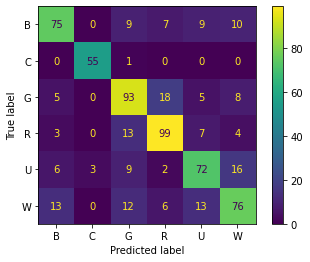

In [19]:
get_test_results(y_test, predictions, logmodel)

Our first pass with Logistic Regression and no tuned parameters actually works out relatively well, all things considered!  We are getting a little over 70% accuracy overall, with Colorless creatures being the easiest for the model to identify by far and Green, Blue and White Creatures each proving to be slightly trickier than Black or Red.  Let's see if we can tune our parameters by using a Grid Search, and see if that improves our results at all.

#### Grid Search for Logistic Regression Hyperparameters

We'll set up a grid search using 4 different potential solvers and a range of C values.  We'll use `RepeatedStratifiedKFold` cross-validation to cross-validate our results and hopefully avoid overfitting.

In [20]:
model = LogisticRegression(max_iter=5000)
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [33]:
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=1, cv=cv, scoring='accuracy', error_score=0)

In [34]:
grid_result = grid_search.fit(normalized_x_train, y_train)

In [35]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.727941 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [36]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [37]:
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

0.711137 (0.027228) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.711060 (0.027210) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.719542 (0.027836) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.711214 (0.026991) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.723468 (0.024159) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.723468 (0.024159) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.727941 (0.026955) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.723545 (0.024286) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.724631 (0.025847) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.724631 (0.025847) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.722167 (0.026553) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.724708 (0.025802) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}
0.692040 (0.027997) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.692116 (0.028024) with: {'C': 0

In [38]:
grid_logmodel = LogisticRegression(max_iter=5000, penalty='l2', solver='liblinear', C=10)

In [39]:
grid_logmodel.fit(normalized_x_train, y_train)

LogisticRegression(C=10, max_iter=5000, solver='liblinear')

In [40]:
grid_predictions = grid_logmodel.predict(normalized_x_test)

              precision    recall  f1-score   support

           B       0.72      0.69      0.70       110
           C       0.95      0.98      0.96        56
           G       0.70      0.70      0.70       129
           R       0.71      0.79      0.75       126
           U       0.73      0.70      0.72       108
           W       0.69      0.65      0.67       120

    accuracy                           0.73       649
   macro avg       0.75      0.75      0.75       649
weighted avg       0.73      0.73      0.73       649





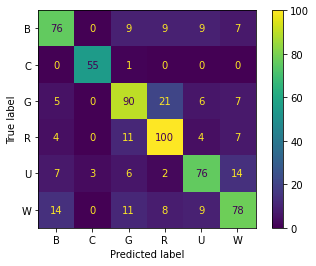

In [41]:
get_test_results(y_test, grid_predictions, grid_logmodel)

Our Grid Search tuning was by no means exhaustive, but it did improve our results slightly, resulting in an overall increase in accuracy and improving All three of our weakest categories of identification (though, at the expense of our previous strongest two categories.

#### LinearSVC

In [43]:
svc_clf = LinearSVC()

In [44]:
svc_clf.fit(normalized_x_train, y_train)

LinearSVC()

In [45]:
svc_preds = svc_clf.predict(normalized_x_test)

              precision    recall  f1-score   support

           B       0.72      0.71      0.72       110
           C       0.95      0.98      0.96        56
           G       0.72      0.73      0.72       129
           R       0.73      0.76      0.74       126
           U       0.71      0.70      0.71       108
           W       0.71      0.67      0.69       120

    accuracy                           0.74       649
   macro avg       0.76      0.76      0.76       649
weighted avg       0.74      0.74      0.74       649





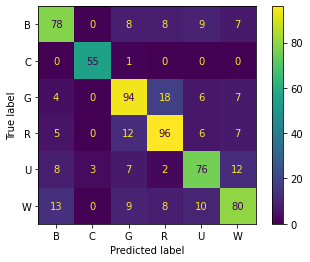

In [46]:
get_test_results(y_test, svc_preds, svc_clf)

In [ ]:
svc_clf.predict_proba

In [63]:
model = LinearSVC(max_iter=5000)
losses = ['hinge', 'squared_hinge']
dual = [True, False]
c_values = [100, 10, 1.0, 0.1, 0.01]

In [64]:
grid = dict(loss=losses, dual=dual, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=1, cv=cv, scoring='accuracy', error_score=0)

In [65]:
grid_result = grid_search.fit(normalized_x_train, y_train)

C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aeric\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [66]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.727328 using {'C': 1.0, 'dual': True, 'loss': 'squared_hinge'}


In [67]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [68]:
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

0.709224 (0.027132) with: {'C': 100, 'dual': True, 'loss': 'hinge'}
0.716076 (0.025034) with: {'C': 100, 'dual': True, 'loss': 'squared_hinge'}
0.000000 (0.000000) with: {'C': 100, 'dual': False, 'loss': 'hinge'}
0.716693 (0.024505) with: {'C': 100, 'dual': False, 'loss': 'squared_hinge'}
0.713695 (0.028181) with: {'C': 10, 'dual': True, 'loss': 'hinge'}
0.720778 (0.024737) with: {'C': 10, 'dual': True, 'loss': 'squared_hinge'}
0.000000 (0.000000) with: {'C': 10, 'dual': False, 'loss': 'hinge'}
0.720702 (0.024592) with: {'C': 10, 'dual': False, 'loss': 'squared_hinge'}
0.721557 (0.028891) with: {'C': 1.0, 'dual': True, 'loss': 'hinge'}
0.727328 (0.026363) with: {'C': 1.0, 'dual': True, 'loss': 'squared_hinge'}
0.000000 (0.000000) with: {'C': 1.0, 'dual': False, 'loss': 'hinge'}
0.727328 (0.026363) with: {'C': 1.0, 'dual': False, 'loss': 'squared_hinge'}
0.694347 (0.031078) with: {'C': 0.1, 'dual': True, 'loss': 'hinge'}
0.722011 (0.025459) with: {'C': 0.1, 'dual': True, 'loss': 'square

Since our grid search returns the default values, there's no real need for us to continue tuning this model.

#### Choosing a K Value

Manually choosing a K Value using the elbow method

In [72]:
error_rate = []

for i in range(1, 60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(normalized_x_train,y_train)
    pred_i = knn.predict(normalized_x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

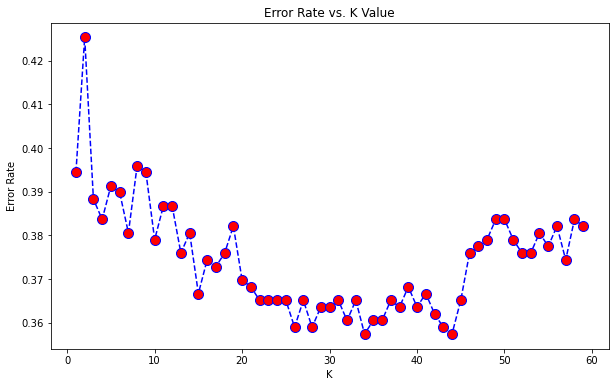

In [73]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [74]:
#K = 23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(normalized_x_train,y_train)
k_preds = knn.predict(normalized_x_test)

              precision    recall  f1-score   support

           B       0.58      0.58      0.58       110
           C       0.85      0.95      0.90        56
           G       0.64      0.69      0.66       129
           R       0.65      0.63      0.64       126
           U       0.58      0.52      0.55       108
           W       0.59      0.58      0.59       120

    accuracy                           0.63       649
   macro avg       0.65      0.66      0.65       649
weighted avg       0.63      0.63      0.63       649





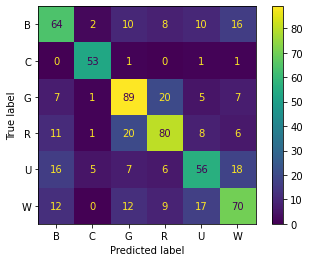

In [76]:
get_test_results(y_test, k_preds, knn)

In [82]:
# define models and parameters
k_model = KNeighborsClassifier()
n_neighbors = range(2, 46, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

In [88]:
# define grid search
k_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
k_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
k_grid_search = GridSearchCV(estimator=k_model, param_grid=k_grid, n_jobs=1, cv=k_cv, scoring='accuracy',error_score=0)
k_grid_result = k_grid_search.fit(normalized_x_train, y_train)

2022-07-04 23:43:30.010489
2022-07-05 01:36:38.120260


In [99]:
# summarize results
print("Best: %f using %s" % (k_grid_result.best_score_, k_grid_result.best_params_))
means = k_grid_result.cv_results_['mean_test_score']
stds = k_grid_result.cv_results_['std_test_score']
params = k_grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.657875 using {'algorithm': 'kd_tree', 'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.657570 (0.026688) with: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.649241 (0.026764) with: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.654648 (0.025945) with: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
0.648391 (0.027658) with: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}
0.647170 (0.025055) with: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
0.648780 (0.027197) with: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'distance'}
0.645016 (0.028433) with: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 16, 'weights': 'uniform'}
0.649092 (0.027631) with: {'algorithm': 'ball_tree', 'metric': 'eucl

<AxesSubplot:>

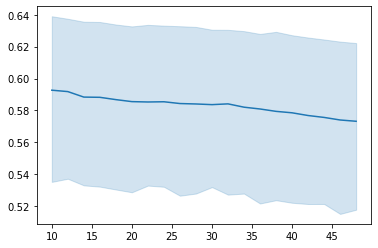

In [90]:
sns.lineplot(x=k_grid_result.cv_results_['param_n_neighbors'], y=k_grid_result.cv_results_['mean_test_score'])

In [92]:
knn_tuned = KNeighborsClassifier(metric='euclidean', n_neighbors=10, weights='uniform', algorithm= 'kd_tree')

              precision    recall  f1-score   support

           B       0.54      0.59      0.57       110
           C       0.91      0.91      0.91        56
           G       0.59      0.63      0.61       129
           R       0.61      0.63      0.62       126
           U       0.63      0.57      0.60       108
           W       0.63      0.56      0.59       120

    accuracy                           0.63       649
   macro avg       0.65      0.65      0.65       649
weighted avg       0.63      0.63      0.63       649





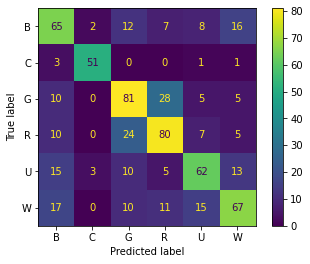

In [93]:
knn_tuned.fit(normalized_x_train,y_train)
k_tuned_preds = knn_tuned.predict(normalized_x_test)

get_test_results(y_test, k_tuned_preds, knn_tuned)

#### Decision Trees

In [94]:
dtree = DecisionTreeClassifier()

In [95]:
dtree.fit(normalized_x_train,y_train)

DecisionTreeClassifier()

In [96]:
tree_preds = dtree.predict(X_test)

              precision    recall  f1-score   support

           B       0.52      0.51      0.52       110
           C       0.93      0.91      0.92        56
           G       0.63      0.52      0.57       129
           R       0.62      0.36      0.45       126
           U       0.32      0.69      0.44       108
           W       0.71      0.44      0.54       120

    accuracy                           0.53       649
   macro avg       0.62      0.57      0.57       649
weighted avg       0.60      0.53      0.54       649





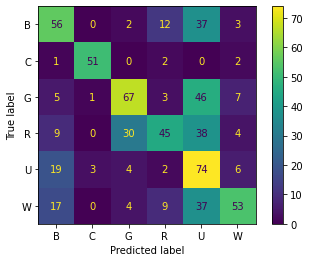

In [97]:
get_test_results(y_test, tree_preds, dtree)

In [103]:
# define models and parameters
tree_model = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
splitters = ['best', 'random']
max_features = ['sqrt', 'log2']

In [104]:
# define grid search
tree_grid = dict(criterion=criterion, splitter=splitters, max_features=max_features)
tree_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
tree_grid_search = GridSearchCV(estimator=tree_model, param_grid=tree_grid, n_jobs=1, cv=tree_cv, scoring='accuracy',error_score=0)
tree_grid_result = tree_grid_search.fit(normalized_x_train, y_train)

In [105]:
# summarize results
print("Best: %f using %s" % (tree_grid_result.best_score_, tree_grid_result.best_params_))
means = tree_grid_result.cv_results_['mean_test_score']
stds = tree_grid_result.cv_results_['std_test_score']
params = tree_grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.585349 using {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}
0.579271 (0.031130) with: {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}
0.585349 (0.029109) with: {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}
0.559927 (0.027188) with: {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best'}
0.575650 (0.030309) with: {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'random'}
0.563856 (0.032638) with: {'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}
0.584820 (0.029410) with: {'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'random'}
0.550676 (0.029718) with: {'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'}
0.574022 (0.030675) with: {'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'random'}


In [106]:
tree_tuned = DecisionTreeClassifier(criterion='gini', max_features='sqrt', splitter='random')

              precision    recall  f1-score   support

           B       0.53      0.50      0.52       110
           C       0.94      0.91      0.93        56
           G       0.55      0.57      0.56       129
           R       0.52      0.60      0.56       126
           U       0.60      0.56      0.58       108
           W       0.56      0.53      0.54       120

    accuracy                           0.58       649
   macro avg       0.62      0.61      0.61       649
weighted avg       0.59      0.58      0.58       649





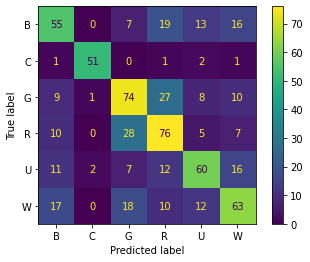

In [107]:
tree_tuned.fit(normalized_x_train,y_train)
tree_tuned_preds = tree_tuned.predict(normalized_x_test)

get_test_results(y_test, tree_tuned_preds, tree_tuned)

In [117]:
rfc = RandomForestClassifier()
rfc.fit(normalized_x_train, y_train)

RandomForestClassifier()

In [118]:
rfc_pred = rfc.predict(normalized_x_test)

              precision    recall  f1-score   support

           B       0.61      0.54      0.57       110
           C       0.92      0.98      0.95        56
           G       0.60      0.69      0.64       129
           R       0.66      0.71      0.68       126
           U       0.67      0.59      0.63       108
           W       0.63      0.60      0.62       120

    accuracy                           0.66       649
   macro avg       0.68      0.68      0.68       649
weighted avg       0.66      0.66      0.66       649





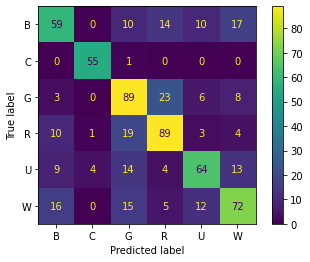

In [119]:
get_test_results(y_test, rfc_pred, rfc)

In [114]:
# define models and parameters
forest_model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

In [115]:
# define grid search
forest_grid = dict(criterion=criterion, n_estimators=n_estimators, max_features=max_features)
forest_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
forest_grid_search = GridSearchCV(estimator=forest_model, param_grid=forest_grid, n_jobs=1, 
                                  cv=tree_cv, scoring='accuracy',error_score=0)
forest_grid_result = forest_grid_search.fit(normalized_x_train, y_train)

In [116]:
# summarize results
print("Best: %f using %s" % (forest_grid_result.best_score_, forest_grid_result.best_params_))
means = forest_grid_result.cv_results_['mean_test_score']
stds = forest_grid_result.cv_results_['std_test_score']
params = forest_grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.676842 using {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 1000}
0.639532 (0.029781) with: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 10}
0.665971 (0.026656) with: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
0.669672 (0.025906) with: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 1000}
0.643556 (0.029995) with: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 10}
0.671525 (0.026876) with: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}
0.676842 (0.027046) with: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 1000}
0.640535 (0.029068) with: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 10}
0.657726 (0.028351) with: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}
0.664355 (0.025263) with: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 1000}
0.641993 (0.029096) with: {'criterion': 'entropy', 'max_features'

In [120]:
forest_tuned = RandomForestClassifier(criterion='gini', max_features='log2', n_estimators=1000)

              precision    recall  f1-score   support

           B       0.65      0.56      0.60       110
           C       0.92      0.96      0.94        56
           G       0.63      0.70      0.66       129
           R       0.66      0.73      0.69       126
           U       0.65      0.61      0.63       108
           W       0.64      0.60      0.62       120

    accuracy                           0.67       649
   macro avg       0.69      0.69      0.69       649
weighted avg       0.67      0.67      0.67       649





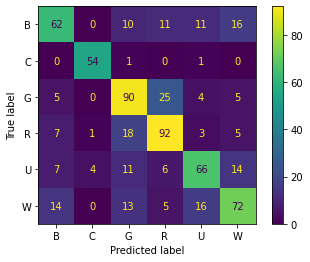

In [121]:
forest_tuned.fit(normalized_x_train,y_train)
forest_tuned_preds = forest_tuned.predict(normalized_x_test)

get_test_results(y_test, forest_tuned_preds, forest_tuned)

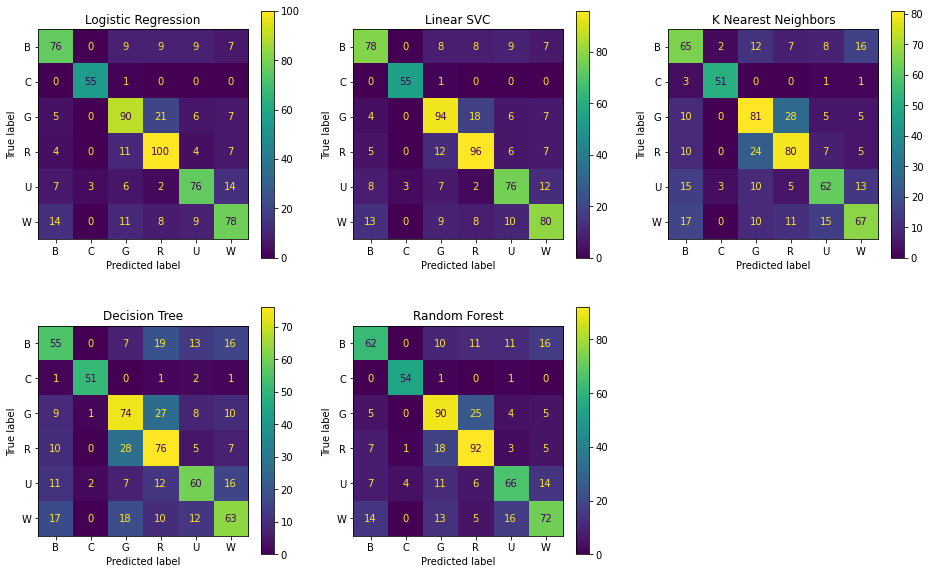

In [144]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10))

cm = confusion_matrix(y_test, grid_predictions, labels=grid_logmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_logmodel.classes_)
axs[0,0].set_title('Logistic Regression')
disp.plot(ax = axs[0,0])

cm = confusion_matrix(y_test, svc_preds, labels=svc_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_clf.classes_)
axs[0,1].set_title('Linear SVC')
disp.plot(ax = axs[0,1])

cm = confusion_matrix(y_test, k_tuned_preds, labels=knn_tuned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_tuned.classes_)
axs[0,2].set_title('K Nearest Neighbors')
disp.plot(ax = axs[0,2])

cm = confusion_matrix(y_test, tree_tuned_preds, labels=tree_tuned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_tuned.classes_)
axs[1,0].set_title('Decision Tree')
disp.plot(ax = axs[1,0])

cm = confusion_matrix(y_test, forest_tuned_preds, labels=forest_tuned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest_tuned.classes_)
axs[1,1].set_title('Random Forest')
disp.plot(ax = axs[1,1])

plt.delaxes(axs[1, 2])

plt.show()

#### Majority Class Labels

In [145]:
clf1 = grid_logmodel

In [146]:
clf2 = svc_clf

In [147]:
clf3 = forest_tuned

In [149]:
eclf = VotingClassifier(
    estimators=[('lr', clf1), ('lsvc', clf2), ('rf', clf3)],
    voting='hard'
)

In [150]:
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'LinearSVC', 'Random Forest', 'Ensemble']):
    scores = cross_val_score(clf, normalized_x_train, y_train, scoring='accuracy', cv=5)
    print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), label))

Accuracy: 0.72 (+/- 0.01) [Logistic Regression]
Accuracy: 0.72 (+/- 0.01) [LinearSVC]
Accuracy: 0.68 (+/- 0.02) [Random Forest]
Accuracy: 0.72 (+/- 0.01) [Ensemble]


In [153]:
eclf.fit(normalized_x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10, max_iter=5000,
                                                 solver='liblinear')),
                             ('lsvc', LinearSVC()),
                             ('rf',
                              RandomForestClassifier(max_features='log2',
                                                     n_estimators=1000))])

In [154]:
eclf_preds = eclf.predict(normalized_x_test)

              precision    recall  f1-score   support

           B       0.72      0.71      0.72       110
           C       0.95      0.98      0.96        56
           G       0.70      0.71      0.71       129
           R       0.72      0.79      0.75       126
           U       0.74      0.69      0.71       108
           W       0.69      0.64      0.67       120

    accuracy                           0.73       649
   macro avg       0.75      0.76      0.75       649
weighted avg       0.73      0.73      0.73       649





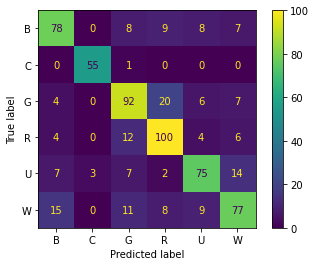

In [155]:
get_test_results(y_test, eclf_preds, eclf)